Another year, another 3-point record. By the end of the 2017-2018 season, NBA teams combined to set a league-wide 3-point record for the sixth consecutive season. Out of 30 teams in the NBA, 19 set franchise records for made 3-pointers by the end of the season, and a couple others came close within reasonable striking distance.

It is  remarkable how different the 1980’s and 1990’s style of play in the NBA was from what we witness today on a nightly basis. The NBA introduced the 3-pointer in the 1979-80 season. At first, many players, coaches, and journalists considered a gimmick that did not fit with any previous x-and-o plays. In the first 3-point season, barely 5,000 were taken across 22 rosters. It was just shy of 3 attempts per game for each team, with most of them just flat-out ignoring the shot and its advantages for most of the year. But as time went on, teams become more and more reliant on the 3-point shot. In fact, the number of 3-point attempts per game has increased from 2.8 in 1980 to 29.0 in 2018. 

Today, the 3-point shot is far from a gimmick that is useful only late in a game when a team is trailing big. Factor in the extra point it awards, and the 3 is one of the most effective shots on the floor. Teams have clearly figured this out, and the trend toward long-range shooting shows no sign of slowing.

In this notebook, we'll look at some trends of 3-point field goals from the 1980 season to 2018 season. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from bs4 import BeautifulSoup, SoupStrainer
import sys, string, requests, datetime, time
%matplotlib inline
import statsmodels.api as  sm
from scipy.stats import linregress

In [2]:
stats = pd.read_csv('Tables/Seasons_Stats.csv')
stats.sort_values(['Year'], ascending=False).head()

,Player,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24690,Ivica Zubac,2017.0,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0
24299,Gerald Green,2017.0,SF,31.0,BOS,47.0,0.0,538.0,12.0,0.524,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0
24297,Danny Green,2017.0,SG,29.0,SAS,68.0,68.0,1807.0,10.2,0.537,...,0.844,31.0,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0
24296,Jerian Grant,2017.0,PG,24.0,CHI,63.0,28.0,1028.0,13.1,0.555,...,0.890,17.0,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0
24295,Jerami Grant,2017.0,SF,22.0,OKC,78.0,4.0,1490.0,10.3,0.566,...,0.619,38.0,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0


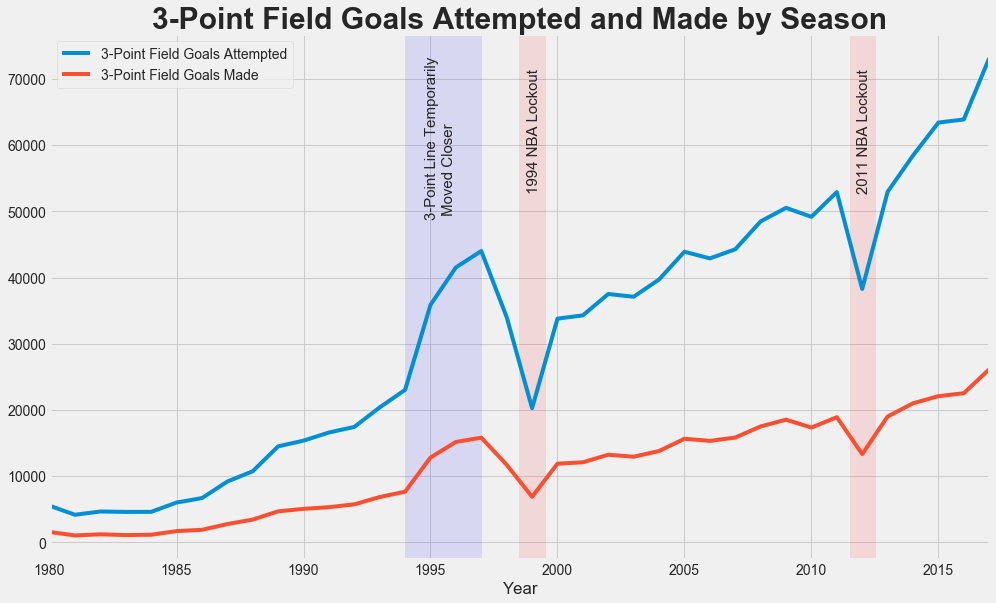

In [3]:
plt.style.use('fivethirtyeight')

three_year = stats[stats['Year'] > 1979]
three_year = three_year.groupby('Year')[['3PA', '3P']].sum()
three_year = three_year.rename(columns={"3PA": "3-Point Field Goals Attempted", 
                                        "3P": "3-Point Field Goals Made"})
three_year.plot(figsize=(15,9))

plt.title("3-Point Field Goals Attempted and Made by Season", weight = 'bold', size = 30)
plt.legend(frameon=True)

plt.axvspan(1998.5, 1999.5, alpha=0.1, color='r')
plt.text(1998.8, 70000, '1994 NBA Lockout', fontsize=15, rotation=90)
plt.axvspan(2011.5, 2012.5, alpha=0.1, color='r')
plt.text(2011.8, 70000, '2011 NBA Lockout', fontsize=15, rotation=90)
plt.axvspan(1994, 1997, alpha=0.1, color='blue')
plt.text(1994.8, 70000, '3-Point Line Temporarily \n Moved Closer', fontsize=15, rotation=90)

plt.savefig('all-graphs/season_3pa_3p.png')

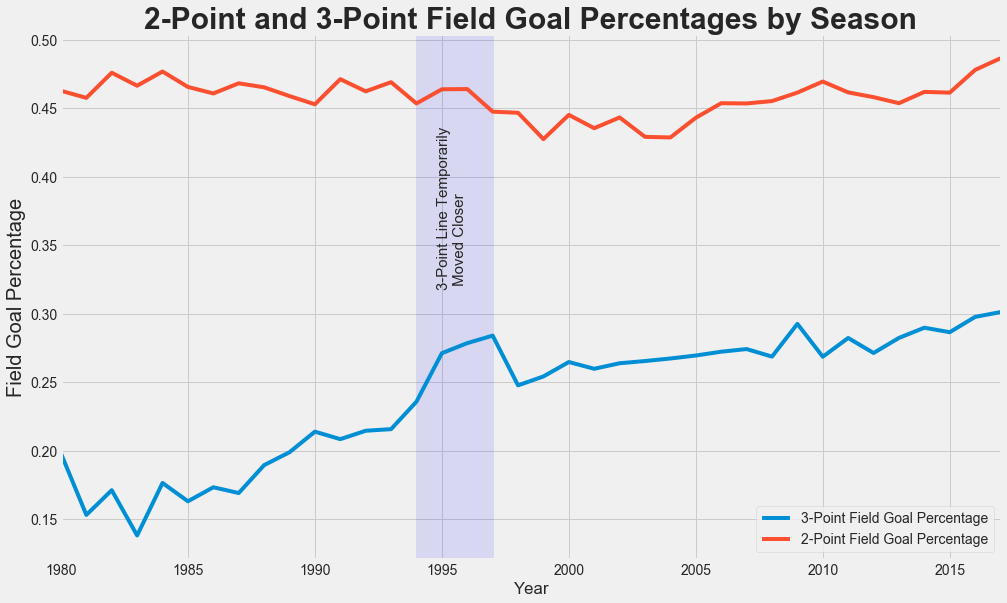

In [4]:
plt.style.use('fivethirtyeight')

pct_year = stats[stats['Year'] > 1979]
pct_year = pct_year.groupby('Year')[['3P%', '2P%']].mean()
pct_year = pct_year.rename(columns={"3P%": "3-Point Field Goal Percentage", 
                                    "2P%": "2-Point Field Goal Percentage"})
pct_year.plot(figsize=(15,9))

plt.title("2-Point and 3-Point Field Goal Percentages by Season", weight = 'bold', size = 30)
plt.ylabel("Field Goal Percentage", fontsize=20)
plt.legend(frameon=True)

plt.axvspan(1994, 1997, alpha=0.1, color='blue')
plt.text(1994.8, 0.42, '3-Point Line Temporarily \n Moved Closer', fontsize=15, rotation=90)

plt.savefig('all-graphs/season_fpg.png')

## Since 2008 Season

Let's take a look at 3-point data in the last ten years. Many consider the 'modern era' of NBA to have started in the mid-2000s. 

Coach Mike D'Antoni of the Phoenix Suns started the 3pt movement, and Mike Brown with the Cavs added to it as well, but it all starts with the Suns, Nash, and D'Antoni.

Once we hit a point where a role player could hit 3's on a points per shot level compared to stars hitting all other shots, the game completely changed. You could now have role players with gravity that took the toughest shots as far as opening the basket it concerned.

The MJ/Kobe style offense we saw in the 90's/early 2000's was built around a star using their gravity/perimeter proficiency to take the tougher shots to open the rim for teammates to get easier looks on offense. Once role players could hit 3's at an efficient level, this flipped the switch to the point that stars could start taking the easier shots and use the gravity they got at the rim to open the perimeter.

The modern NBA is built around role players getting better at opening the floor more than anything else. We have entirely new offenses possible now due to role players being able to punish teams when left open beyond the arc.

In [5]:
# only include from years 2008
modern_era = stats[stats['Year'] > 2008]

# player's career 3PA and 3PM
threePT_data = modern_era.groupby('Player')[['3PA', '3P']].sum().sort_values(by=['3P'], ascending=False)

# player's career 3pt attempt rate and 3pt percentage
PAr_Percent = pd.DataFrame(modern_era.groupby('Player')[['3PAr','3P%']].mean())

# merge two dataframes on index Player
threePT_data = pd.merge(threePT_data, PAr_Percent, left_index=True, right_index=True)

# find top 10% of career 3-points attempted (around 1,000)
to90_3pa = stats.groupby('Player')['3PA'].sum().quantile(0.9)

# narrrow players to top 10% 3PA
threePT_data = threePT_data[threePT_data['3PA'] > to90_3pa]

threePT_data.head()

,3PA,3P,3PAr,3P%
Player,,,,
Stephen Curry,4379.0,1917.0,0.440750,0.439875
J.R. Smith,3980.0,1498.0,0.510455,0.372909
Kyle Korver,3307.0,1477.0,0.623455,0.448727
James Harden,3801.0,1382.0,0.426125,0.366125
J.J. Redick,3374.0,1381.0,0.503182,0.400364


The data that we are using includes player stats for not just 3-point specialists, but all historical players regardless of position or three point attempts. Because there is a lot of data here to visualize, we narrowed down to players who have taken a lot of 3-pointers in their careers, specifically those who are in the top 10% of three pointerse taken. 

We excluded any players who have made fewer than 1,016 three-point field goals in their careers

In [6]:
top90_3pa = stats.groupby('Player')['3PA'].sum().quantile(0.90)
print("Top 10% of career 3-point shots attempted: {}".format(top90_3pa))

Top 10% of career 3-point shots attempted: 1016.0


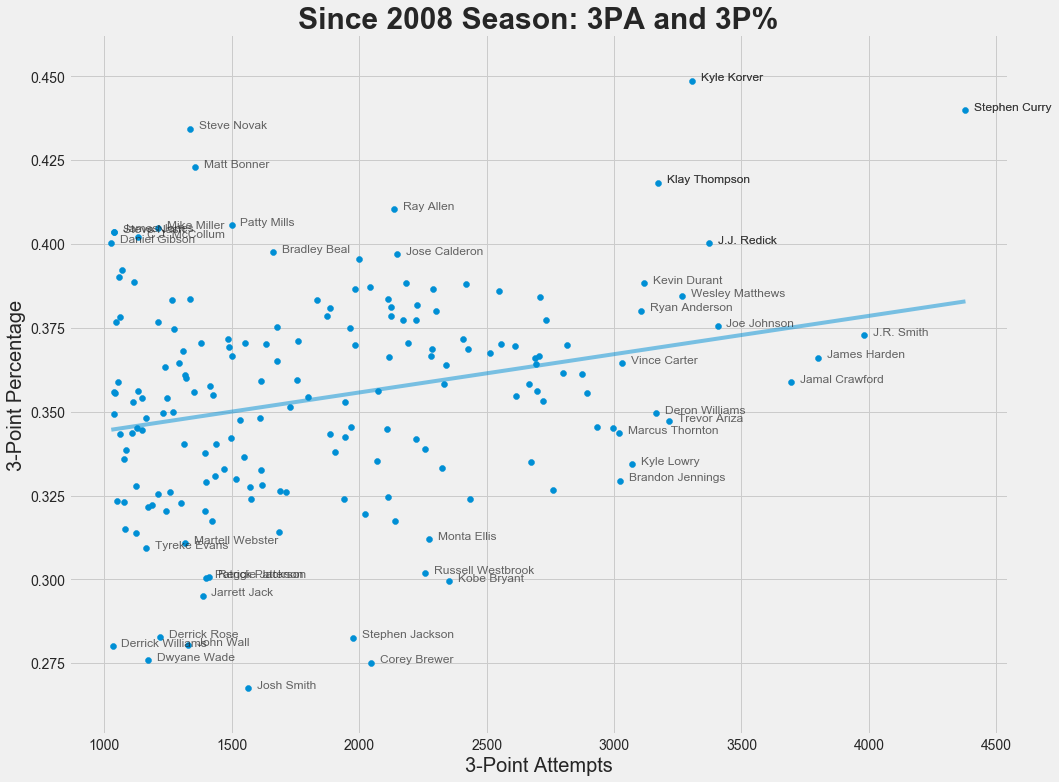

In [7]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,12))

x_plot = threePT_data['3PA']
y_plot = threePT_data['3P%']

plt.scatter(threePT_data['3PA'], threePT_data['3P%'])
plt.title("Since 2008 Season: 3PA and 3P%", weight = 'bold', size = 30)
plt.xlabel("3-Point Attempts", fontsize=20)
plt.ylabel("3-Point Percentage", fontsize=20)

plt.plot(np.unique(threePT_data['3PA']), 
         np.poly1d(np.polyfit(threePT_data['3PA'], threePT_data['3P%'], 1))
         (np.unique(threePT_data['3PA'])), alpha=0.5)

def annotate(df):
    for i in range(len(df)):
        plt.text(df['3PA'][i]+35, df['3P%'][i], df.index[i], fontsize=12, alpha=.7)

annotate(threePT_data.sort_values('3PA', ascending=False)[:17])
annotate(threePT_data.sort_values('3P%', ascending=False)[:15])
annotate(threePT_data.sort_values('3P%', ascending=True)[:15])

In [8]:
threePA_threePP = threePT_data[['3PA', '3P%']]

from sklearn.cluster import KMeans # unsupervised
kmeans = KMeans(n_clusters=3)
kmeans.fit(threePA_threePP)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
threePA_threePP['category'] = pd.DataFrame(kmeans.labels_).values
threePA_threePP.head()

C:\Users\ymeri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,3PA,3P%,category
Player,,,
Stephen Curry,4379.0,0.439875,1
J.R. Smith,3980.0,0.372909,1
Kyle Korver,3307.0,0.448727,1
James Harden,3801.0,0.366125,1
J.J. Redick,3374.0,0.400364,1


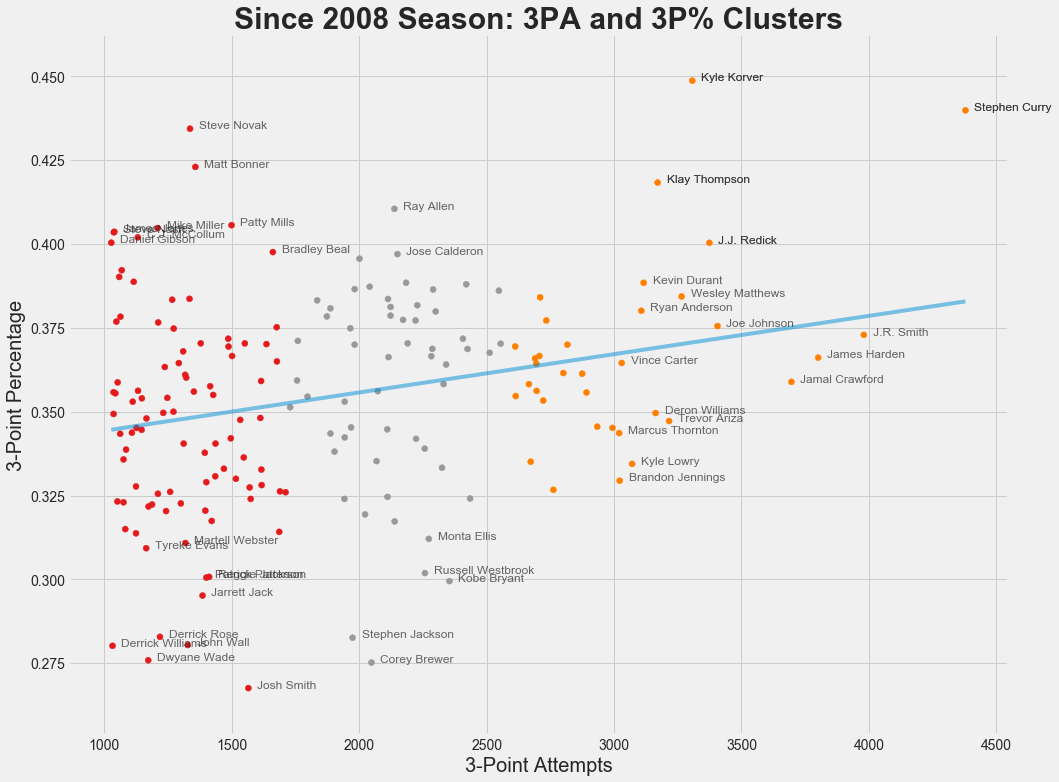

In [10]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,12))

x_plot = threePT_data['3PA']
y_plot = threePT_data['3P%']

plt.scatter(threePT_data['3PA'], threePT_data['3P%'], c=kmeans.labels_, cmap='Set1')
plt.title("Since 2008 Season: 3PA and 3P% Clusters", weight = 'bold', size = 30)
plt.xlabel("3-Point Attempts", fontsize=20)
plt.ylabel("3-Point Percentage", fontsize=20)

plt.plot(np.unique(threePT_data['3PA']), 
         np.poly1d(np.polyfit(threePT_data['3PA'], threePT_data['3P%'], 1))
         (np.unique(threePT_data['3PA'])), alpha=0.5)

def annotate(df):
    for i in range(len(df)):
        plt.text(df['3PA'][i]+35, df['3P%'][i], df.index[i], fontsize=12, alpha=.7)

annotate(threePT_data.sort_values('3PA', ascending=False)[:17])
annotate(threePT_data.sort_values('3P%', ascending=False)[:15])
annotate(threePT_data.sort_values('3P%', ascending=True)[:15])

In [11]:
from sklearn.cluster import KMeans # unsupervised
kmeans = KMeans(n_clusters=3)
kmeans.fit(threePT_data[['3PAr', '3P%']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

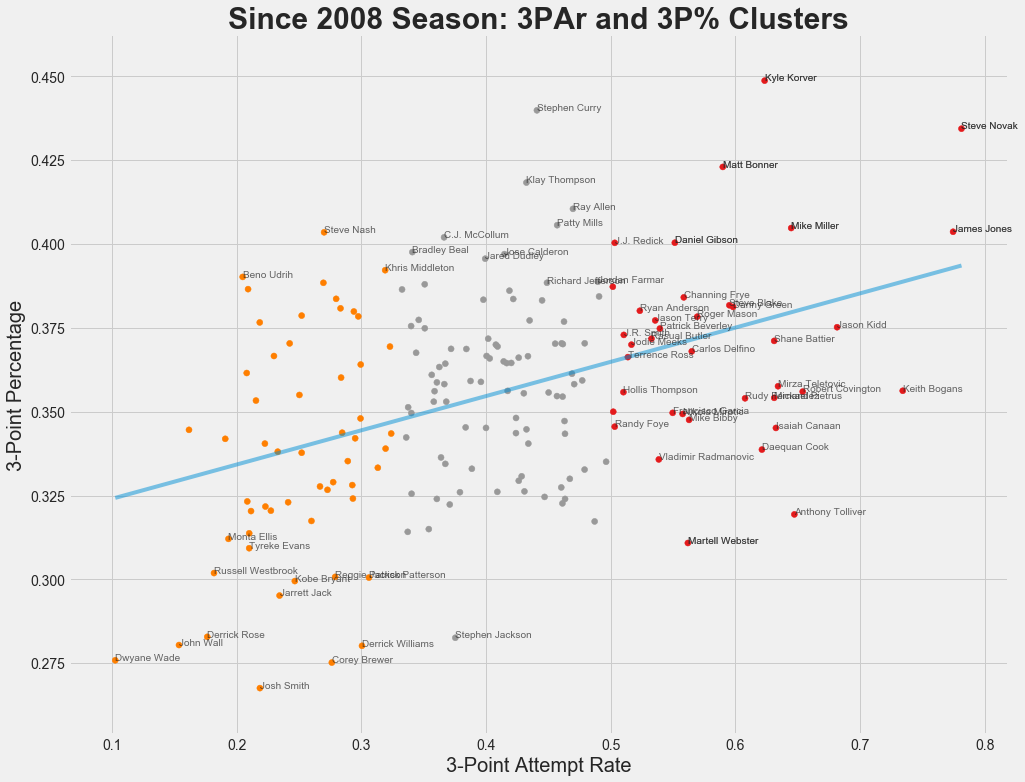

In [12]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,12))

x_plot = threePT_data['3PAr']
y_plot = threePT_data['3P%']

plt.scatter(threePT_data['3PAr'], threePT_data['3P%'], c=kmeans.labels_, cmap='Set1')
plt.title("Since 2008 Season: 3PAr and 3P% Clusters", weight = 'bold', size = 30)
plt.xlabel("3-Point Attempt Rate", fontsize=20)
plt.ylabel("3-Point Percentage", fontsize=20)

plt.plot(np.unique(threePT_data['3PAr']), 
         np.poly1d(np.polyfit(threePT_data['3PAr'], threePT_data['3P%'], 1))
         (np.unique(threePT_data['3PAr'])), alpha=0.5)

def annotate(df):
    for i in range(len(df)):
        plt.text(df['3PAr'][i], df['3P%'][i], df.index[i],
                fontsize=10, alpha=0.7)

annotate(threePT_data.sort_values('3PAr', ascending=False)[:35])
annotate(threePT_data.sort_values('3P%', ascending=False)[:20])
annotate(threePT_data.sort_values('3P%', ascending=True)[:15])


## Since 1980 Season

Now, let's take a look at all 3-point data, regardless of which era someone plalyed in.

In [13]:
# player's career 3PA and 3PM
threePT_data = stats.groupby('Player')[['3PA', '3P']].sum().sort_values(by=['3P'], ascending=False)

# player's career 3pt attempt rate and 3pt percentage
PAr_Percent = pd.DataFrame(stats.groupby('Player')[['3PAr','3P%']].mean())

# merge two dataframes on index Player
threePT_data = pd.merge(threePT_data, PAr_Percent, left_index=True, right_index=True)

# find top 10% of career 3-points attempted (around 1,000)
to90_3pa = stats.groupby('Player')['3PA'].sum().quantile(0.9)

# narrrow players to top 10% 3PA
threePT_data = threePT_data[threePT_data['3PA'] > to90_3pa]

threePT_data.head(10)

,3PA,3P,3PAr,3P%
Player,,,,
Ray Allen,7962.0,3174.0,0.401750,0.396950
Reggie Miller*,6486.0,2560.0,0.378500,0.391167
Kyle Korver,5409.0,2322.0,0.594222,0.427611
Vince Carter,6119.0,2292.0,0.304130,0.366652
Tim Hardaway,6349.0,2251.0,0.418333,0.352381
Chauncey Billups,5810.0,2245.0,0.438739,0.364174
Jason Terry,5895.0,2242.0,0.434667,0.379556
Jamal Crawford,6255.0,2191.0,0.382211,0.357895
Jason Kidd,6178.0,2168.0,0.396304,0.353304




Let's use a player's 3-pt field goals attempted and 3-pt field goal percentage to cluster them into 3 groups.

In [14]:
threePA_threePP = threePT_data[['3PA', '3P%']]

from sklearn.cluster import KMeans # unsupervised
kmeans = KMeans(n_clusters=3)
kmeans.fit(threePA_threePP)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
threePA_threePP['category'] = pd.DataFrame(kmeans.labels_).values
threePA_threePP.head()

C:\Users\ymeri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,3PA,3P%,category
Player,,,
Ray Allen,7962.0,0.396950,2
Reggie Miller*,6486.0,0.391167,2
Kyle Korver,5409.0,0.427611,2
Vince Carter,6119.0,0.366652,2
Tim Hardaway,6349.0,0.352381,2


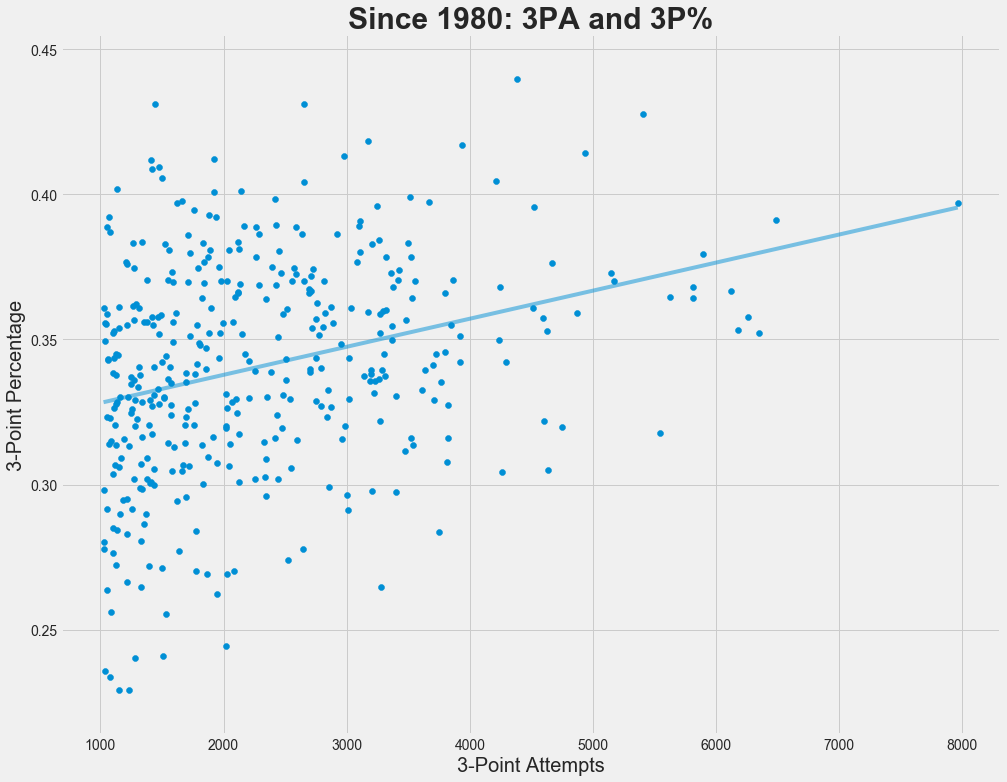

In [16]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,12))

x_plot = threePT_data['3PA']
y_plot = threePT_data['3P%']

plt.scatter(threePT_data['3PA'], threePT_data['3P%'])
plt.title("Since 1980: 3PA and 3P%", weight = 'bold', size = 30)
plt.xlabel("3-Point Attempts", fontsize=20)
plt.ylabel("3-Point Percentage", fontsize=20)

plt.plot(np.unique(threePT_data['3PA']), 
         np.poly1d(np.polyfit(threePT_data['3PA'], threePT_data['3P%'], 1))
         (np.unique(threePT_data['3PA'])), alpha=0.5)

plt.savefig('all-graphs/corr_3PA_3P%.png')

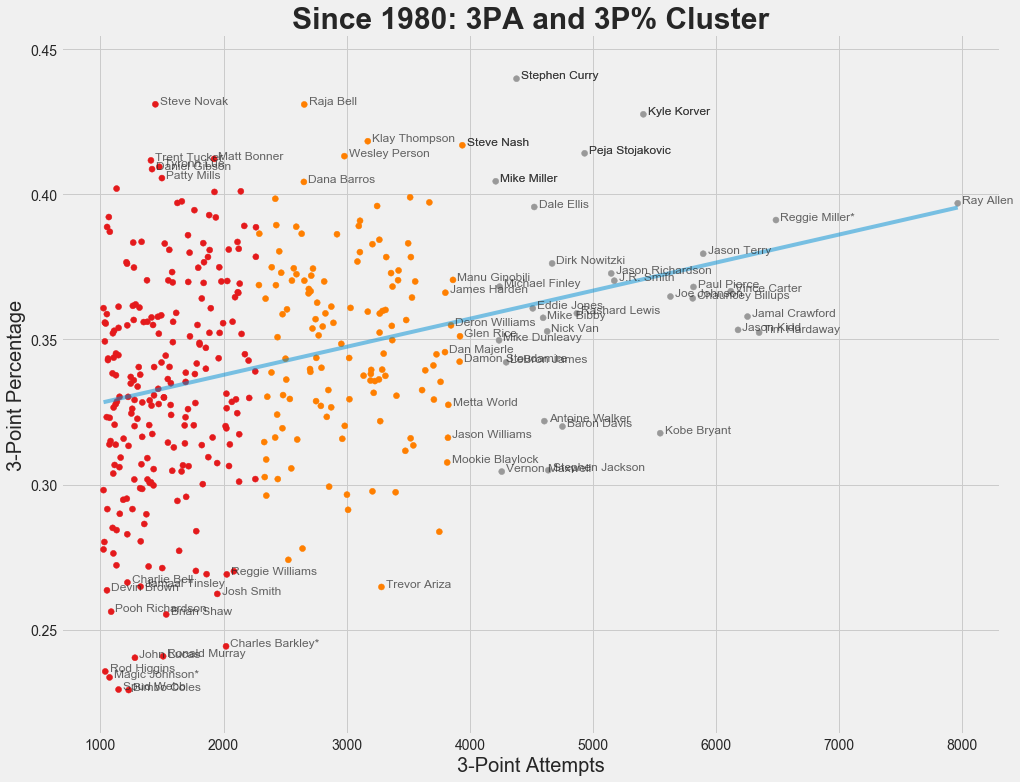

In [17]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,12))

x_plot = threePT_data['3PA']
y_plot = threePT_data['3P%']

plt.scatter(threePT_data['3PA'], threePT_data['3P%'], c=kmeans.labels_, cmap='Set1')
plt.title("Since 1980: 3PA and 3P% Cluster", weight = 'bold', size = 30)
plt.xlabel("3-Point Attempts", fontsize=20)
plt.ylabel("3-Point Percentage", fontsize=20)

plt.plot(np.unique(threePT_data['3PA']), 
         np.poly1d(np.polyfit(threePT_data['3PA'], threePT_data['3P%'], 1))
         (np.unique(threePT_data['3PA'])), alpha=0.5)

def annotate(df):
    for i in range(len(df)):
        plt.text(df['3PA'][i]+35, df['3P%'][i], df.index[i], fontsize=12, alpha=.7)

annotate(threePT_data.sort_values('3PA', ascending=False)[:40])
annotate(threePT_data.sort_values('3P%', ascending=False)[:15])
annotate(threePT_data.sort_values('3P%', ascending=True)[:15])

plt.savefig('all-graphs/cluster_corr_3PA_3P%.png')

In [18]:
print(linregress(threePT_data['3PA'], threePT_data['3P%']))

LinregressResult(slope=9.672667995766632e-06, intercept=0.3184691991466108, rvalue=0.2987045047971458, pvalue=1.6049202995599209e-09, stderr=1.5648686984794115e-06)


In [19]:
from sklearn.cluster import KMeans # unsupervised
kmeans = KMeans(n_clusters=3)
kmeans.fit(threePT_data[['3PAr', '3P%']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

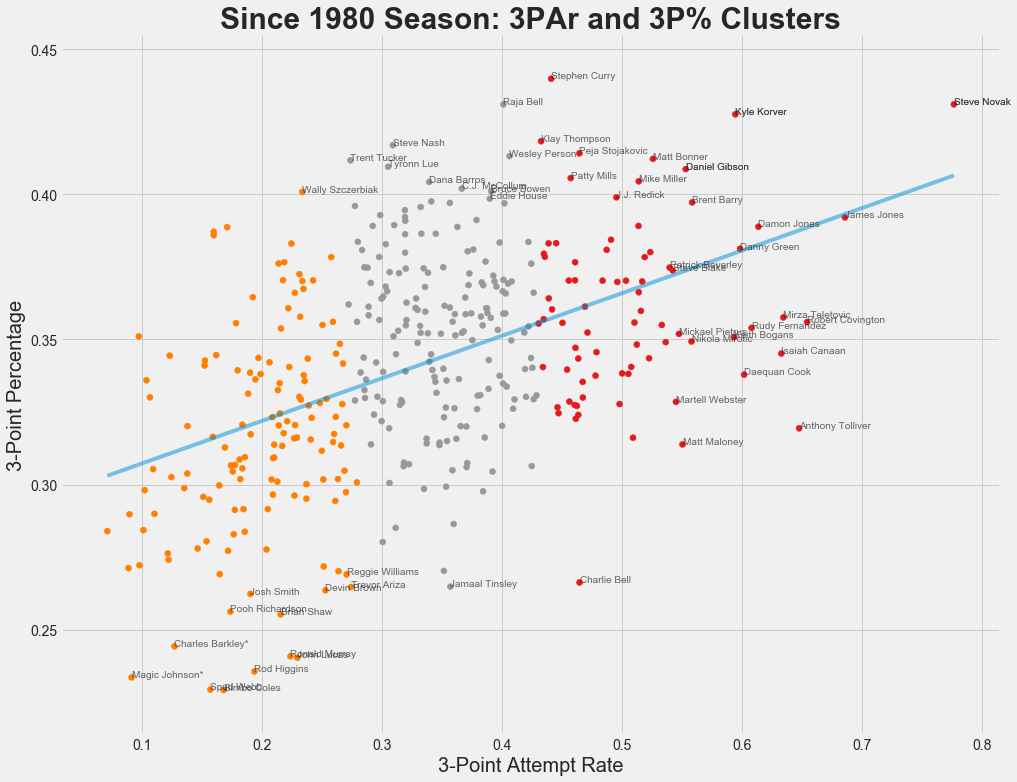

In [20]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,12))

x_plot = threePT_data['3PAr']
y_plot = threePT_data['3P%']

plt.scatter(threePT_data['3PAr'], threePT_data['3P%'], c=kmeans.labels_, cmap='Set1')
plt.title("Since 1980 Season: 3PAr and 3P% Clusters", weight = 'bold', size = 30)
plt.xlabel("3-Point Attempt Rate", fontsize=20)
plt.ylabel("3-Point Percentage", fontsize=20)

plt.plot(np.unique(threePT_data['3PAr']), 
         np.poly1d(np.polyfit(threePT_data['3PAr'], threePT_data['3P%'], 1))
         (np.unique(threePT_data['3PAr'])), alpha=0.5)

def annotate(df):
    for i in range(len(df)):
        plt.text(df['3PAr'][i], df['3P%'][i], df.index[i],
                fontsize=10, alpha=0.7)

annotate(threePT_data.sort_values('3PAr', ascending=False)[:20])
annotate(threePT_data.sort_values('3P%', ascending=False)[:20])
annotate(threePT_data.sort_values('3P%', ascending=True)[:15])

plt.savefig('all-graphs/corr_3PAr_3P%.png')

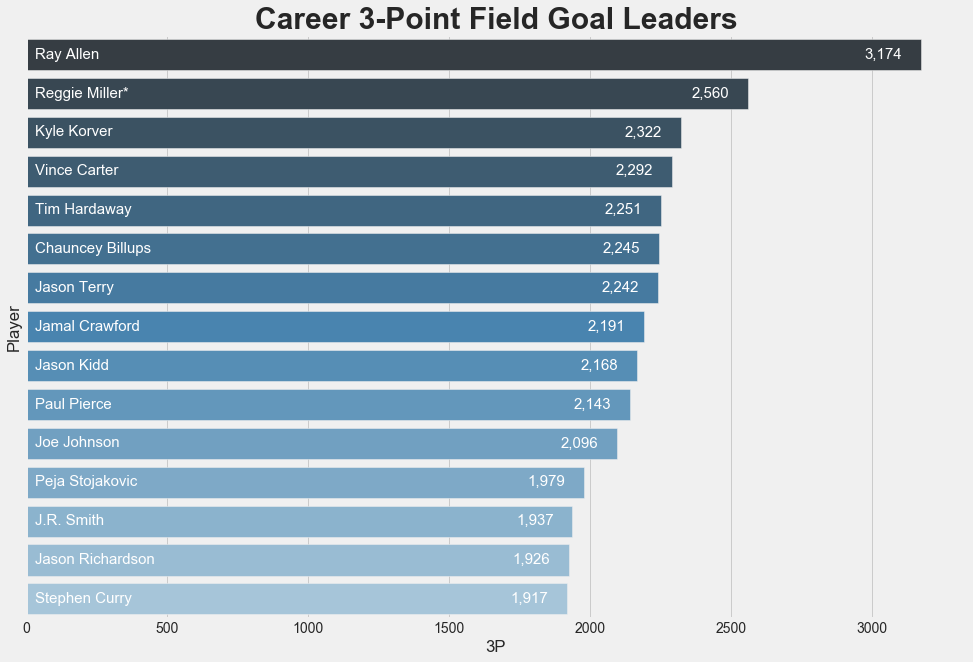

In [21]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,10))

top_shooters = stats.groupby('Player').sum().sort_values(by='3P', ascending=False)
top_shooters = top_shooters[:15]
sns.barplot(x='3P', y=top_shooters.index, data=top_shooters, palette="Blues_d")

for num in range(len(top_shooters)):
    plt.text(top_shooters['3P'][num]-200, num, "{:,}".format(int(top_shooters['3P'][num])), color='white', size=15, verticalalignment='center')
    plt.text(30, num, top_shooters.index[num], color='white', size=15, verticalalignment='center')

plt.title("Career 3-Point Field Goal Leaders", weight = 'bold', size = 30)
plt.gca().set_yticks([]);

plt.savefig('all-graphs/career_3pt.png')

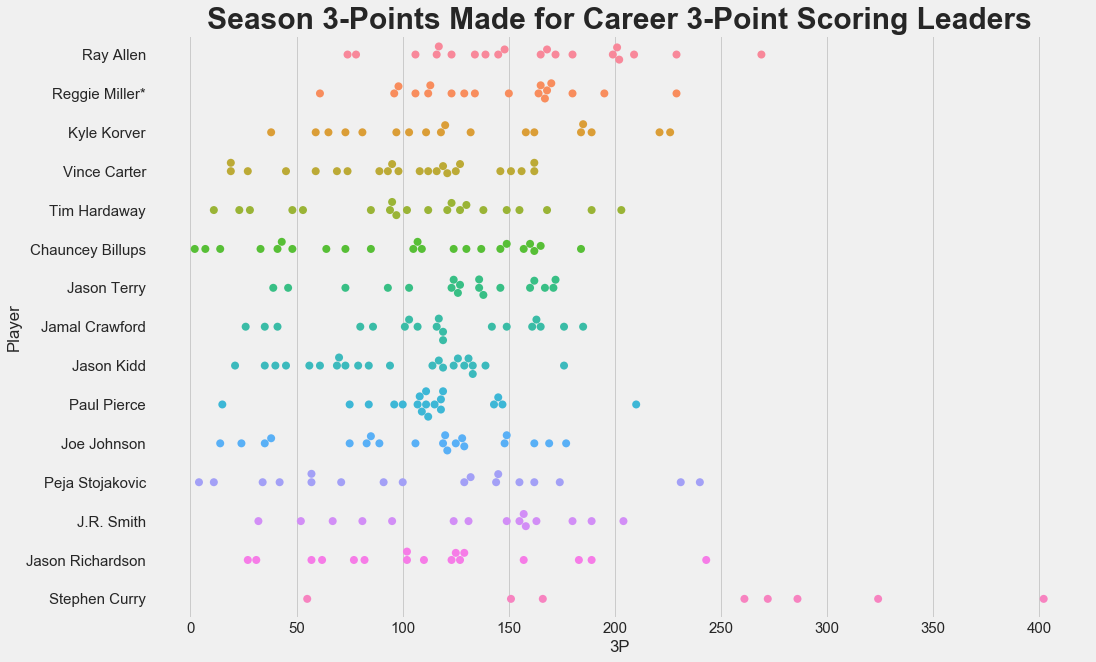

In [22]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,10))

# filter by top-15 career 3-pt shooters
top_shooters_seasons = stats[stats['Player'].isin(top_shooters.index)][['Player', 'Year', '3P']]

# sort by career 3-pt ranking
top_shooters_seasons.Player = top_shooters_seasons.Player.astype("category")
top_shooters_seasons.Player.cat.set_categories(top_shooters.index, inplace=True)
top_shooters_seasons.sort_values(['Player'])

sns.swarmplot(x='3P', y='Player', data=top_shooters_seasons, size=8)
plt.title("Season 3-Points Made for Career 3-Point Scoring Leaders", weight = 'bold', size = 30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('all-graphs/career_3pt_swarm.png')